## Seguimiento - PointsMovingAverage

**Realización de gráfico con la media móvil de puntos obtenidos por un equipo, de cara a investigar el nivel de las actuaciones de un equipo en el long-run (varias temporadas)**

In [33]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Descargaremos de Football-Data los resultados de todos los partidos de Premier League desde la primera temporada de Pep Guardiola en el Manchester City, temporada a temporada. Meteremos todos los partidos de todas la temporadas en el mismo dataframe.

In [38]:
dflist = []
season_list = []

for year in range(16,22,1):
    if year<9:
        yeartext='0'+str(year)+'0'+str(year+1)
        yeartext2='0'+str(year)+'-0'+str(year+1)
    elif year==9:
        yeartext='0910'
        yeartext2='09-10'
    else:
        yeartext=str(year)+str(year+1)
        yeartext2=str(year)+'-'+str(year+1)
    
    df =  pd.read_csv("https://www.football-data.co.uk/mmz4281/"+yeartext+"/E0.csv",delimiter=',') 
    df['Season'] = yeartext2
    season_list.append(yeartext2)
    dflist.append(df)

df_seasons = pd.concat(dflist).reset_index()

In [39]:
df_seasons.head()

,index,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,0,E0,13/08/16,Burnley,Swansea,0,1,A,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,E0,13/08/16,Crystal Palace,West Brom,0,1,A,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,E0,13/08/16,Everton,Tottenham,1,1,D,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,E0,13/08/16,Hull,Leicester,2,1,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,E0,13/08/16,Man City,Sunderland,2,1,H,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Compararemos el desempeño durante esas temporadas del Manchester City con el rendimiento del resto del big6.

In [40]:
#top6 teams
teams = ['Man City', 'Liverpool', 'Arsenal', 'Chelsea', 'Tottenham', 'Man United']

team_dfs = dict()
for team in teams:
    team_df = pd.DataFrame(columns = ['Points','Date','Game'])
    matches = df_seasons.loc[(df_seasons['AwayTeam'] == team) | (df_seasons['HomeTeam'] == team)]
    game = 0
    
    for i,j in matches.iterrows():
        game += 1
        date = j['Date']
        if j['AwayTeam']==team:
            goalsfor = j['FTAG']
            goalsagainst = j['FTHG']
            #assign 3 points if win, 1 if draw, 0 if lost
            if j['FTR'] == 'A':
                points = 3
            elif j['FTR'] == 'D':
                points = 1
            else:
                points = 0
        else:
            # if team is hometeam
            goalsfor = j['FTHG']
            goalsagainst = j['FTAG']
            if j['FTR'] == 'H':
                points = 3
            elif j['FTR'] == 'D':
                points = 1      
            else:
                points = 0
                #assign value to dataframe
                
        team_df.at[i,'Points'] = points
        team_df.at[i,'Game'] = game 
        team_df.at[i,'Date'] = date
        
    team_df['PointsRA'] = team_df['Points'].rolling(window = 10, win_type='triang').mean()
    team_dfs[team] = team_df

Ya tenemos el dataframe, nos falta plantear la visualización.

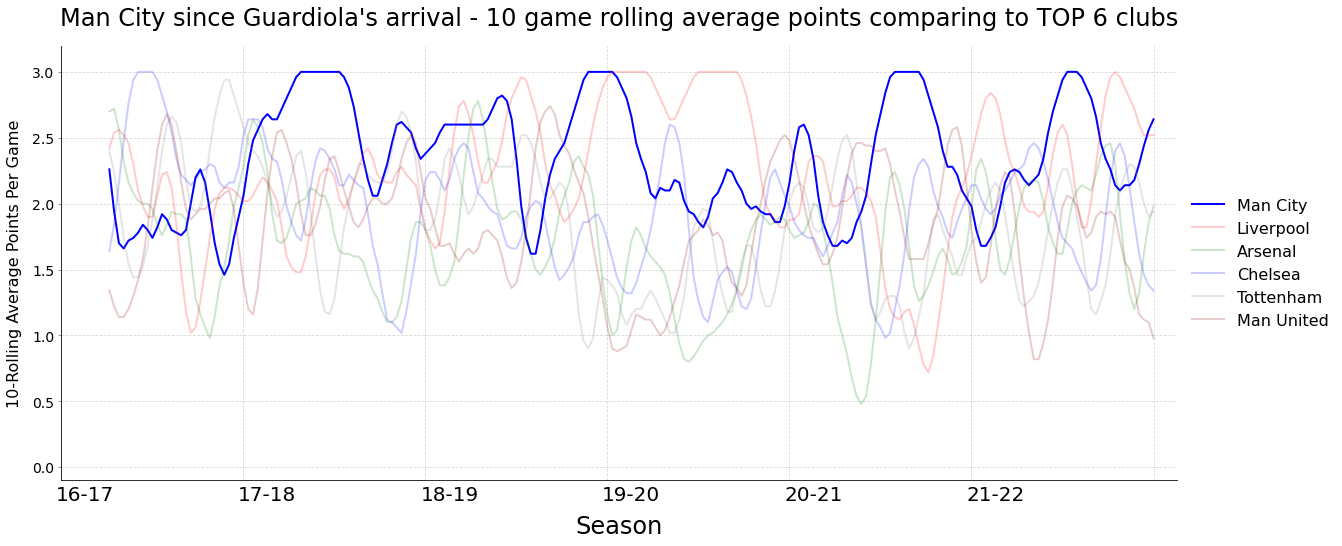

In [43]:
fig, ax = plt.subplots(figsize=(20, 8))
colors = ['blue', 'red', 'green', 'blue', 'grey', 'darkred']
#city highlighted more
alphas = [1, 0.2, 0.2, 0.2, 0.2, 0.2]

for club,color,alpha in zip(teams,colors,alphas):
    ax.plot(team_dfs[club]['Game'], team_dfs[club]['PointsRA'], linewidth=2, linestyle='-',color=color, alpha = alpha, zorder = 2, label = club)
ax.set_title("Man City since Guardiola's arrival - 10 game rolling average points comparing to TOP 6 clubs", fontsize = 24, pad=20)
ax.set_xticks(np.arange(0, max(team_dfs[club]['Game']) + 38, 38))
ax.set_xticklabels([])
#make ticks in the middle
ax.set_xticks(np.arange(0, max(team_dfs[club]['Game']), 38) + 5, minor=True)
ax.set_xticklabels(season_list, minor=True)

ax.set_xlim(0, max(team_dfs[club]['Game']) + 5)
ax.set_ylim(-0.1,3.2)
ax.tick_params(axis='x', color='white', which='both', labelsize = 20)
ax.tick_params(axis='y', color='grey', labelsize = 14)
ax.grid(zorder = 1, linestyle = "--", alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('10-Rolling Average Points Per Game', fontsize = 16,labelpad=10)
ax.set_xlabel('Season', fontsize = 24, labelpad=10)
plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left",fontsize=16, edgecolor='white')
sns.despine()
plt.show();

## Challenge
1. Improve so that the rolling average is calculated for each season independently!
2. Make this plot for Norwich and account for their relegations!


In [45]:
nw = df_seasons[df_seasons.HomeTeam.str.contains('Norwich')].HomeTeam.values[0]
nw

'Norwich'

In [56]:
dflist = []
season_list = []

for year in range(13,22,1):
    if year<9:
        yeartext='0'+str(year)+'0'+str(year+1)
        yeartext2='0'+str(year)+'-0'+str(year+1)
    elif year==9:
        yeartext='0910'
        yeartext2='09-10'
    else:
        yeartext=str(year)+str(year+1)
        yeartext2=str(year)+'-'+str(year+1)
    
    df =  pd.read_csv("https://www.football-data.co.uk/mmz4281/"+yeartext+"/E0.csv",delimiter=',') 
    df['Season'] = yeartext2
    
    if nw in list(df.HomeTeam.unique()):
        season_list.append(yeartext2)
        dflist.append(df)

df_seasons = pd.concat(dflist).reset_index()

In [77]:
seasons = dict()
for season in season_list:
    season_df = pd.DataFrame(columns = ['Points','Date','Game'])
    matches = df_seasons.loc[((df_seasons['AwayTeam'] == nw) | (df_seasons['HomeTeam'] == nw)) & (df_seasons.Season==season)]
    game = 0
    
    for i,j in matches.iterrows():
        game += 1
        date = j['Date']
        if j['AwayTeam']==team:
            goalsfor = j['FTAG']
            goalsagainst = j['FTHG']
            #assign 3 points if win, 1 if draw, 0 if lost
            if j['FTR'] == 'A':
                points = 3
            elif j['FTR'] == 'D':
                points = 1
            else:
                points = 0
        else:
            # if team is hometeam
            goalsfor = j['FTHG']
            goalsagainst = j['FTAG']
            if j['FTR'] == 'H':
                points = 3
            elif j['FTR'] == 'D':
                points = 1      
            else:
                points = 0
                #assign value to dataframe
                
        season_df.at[i,'Points'] = points
        season_df.at[i,'Game'] = game 
        season_df.at[i,'Date'] = date
        
    season_df['PointsRA'] = season_df['Points'].rolling(window = 6, win_type='triang').mean()
    seasons[season] = season_df

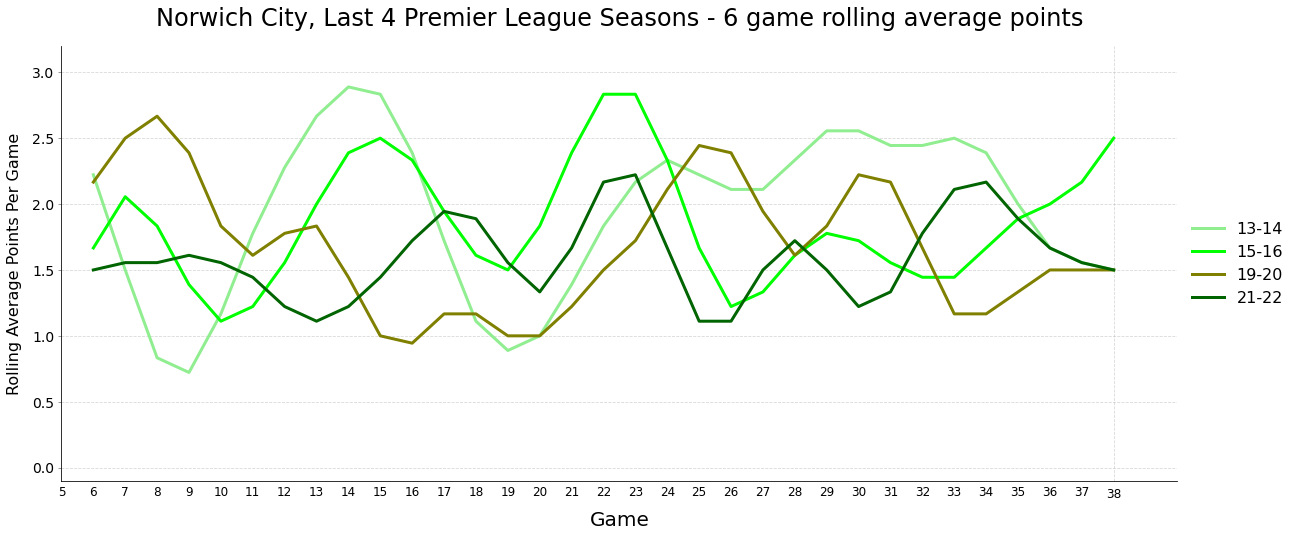

In [113]:
fig, ax = plt.subplots(figsize=(20, 8))
colors = ['lightgreen', 'lime', 'olive','darkgreen']

for season,color in zip(season_list,colors):
    ax.plot(seasons[season]['Game'], seasons[season]['PointsRA'], linewidth=3, linestyle='-',color=color, alpha = 1, zorder = 2, label = season)
ax.set_title("Norwich City, Last {:.0f} Premier League Seasons - 6 game rolling average points".format(len(season_list)), fontsize = 24, pad=20)
ax.set_xticks(np.arange(0, max(seasons[season]['Game']) + 38, 38))
#ax.set_xticklabels([])
#make ticks in the middle
ax.set_xticks(np.arange(0, 38, 1) + 1, minor=True)
ax.set_xticklabels(np.arange(0, 38, 1) +1, minor=True)

ax.set_xlim(5, 38 + 2)
ax.set_ylim(-0.1,3.2)
ax.tick_params(axis='x', color='white', which='both', labelsize = 12)
ax.tick_params(axis='y', color='grey', labelsize = 14)
ax.grid(zorder = 1, linestyle = "--", alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('Rolling Average Points Per Game', fontsize = 16,labelpad=10)
ax.set_xlabel('Game', fontsize = 20, labelpad=10)
plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left",fontsize=16, edgecolor='white')
sns.despine()
plt.show();